<a href="https://colab.research.google.com/github/YixuPan/EE-Machine-Learning/blob/main/04_ML_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression


---

Despite of the efficiency of the perceptron algorithm in binary classification tasks; however, the algorithm never converges when the data are not linearly seperable. Logistic regression is a supervised ML algorithm that is used in binary classification problems. The algorithm converts the linear model predictions into a probability between 0 and 1. For better understanding of this algorithm, let us recall the odds ratio, which is the odds in favour of a particular event to occur. The odds ratio can be formulated as $\frac{p}{1-p}$, where $p$ is the probability of a positive event (the event that we want to predict e.g. $y = 1$). Let us now extend our previous discussion and define the logit function, which is simply the logarithm of the odds ratio (log-odds) given by the following equation:

\begin{equation}
logit(p) = \log \left(\frac{p}{1-p}\right)
\end{equation}

As $p$ is a probability, the logit function takes a value between 0 and 1 and transforms them to values over the entire real number range, which we can use to express a linear relationship between feature values and the log-odds.

\begin{equation}
logit\left(p\left(y=1|\mathbf{x}\right)\right)=w_0x_0 + w_1x_1 + \ldots + w_nx_n = \sum_{i=0}^{n} w_nx_n
\end{equation}

Hence, $p\left(y=1|\mathbf{x}\right)$ is the probability of a sample point that belongs to class 1 given its features $x$. However, in the learning process, we are more interested in the opposite case such that predicting the probability that a certain sample belongs to a particular class, which is simply the inverse of the logit function. The inverse of the logit function is called the $logistic$ function (also know as $Sigmoid$ function). The Sigmoid function is given by the equation below:

\begin{equation}
\sigma(z) = \frac{1}{1+e^{-z}}
\end{equation}

Hence, $z$ is the net input, that is, the linear combination of weights and sample features such that $z = \sum_{i=0}^{n} w_nx_n$. The Sigmoid function can be further visualised and plotted using the figure below:

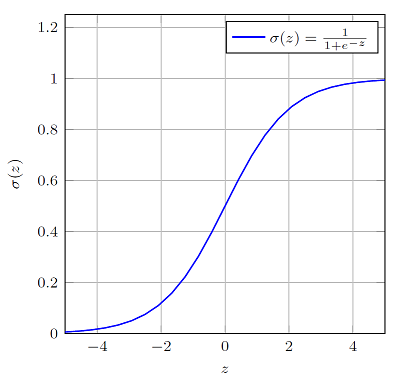

From the figure above we can observe that the Sigmoid function is bouned between 0 and 1. Such that if $z$ goes toward infinity ($z \to \infty$) then $\sigma(z)=\frac{1}{1+e^{-\infty}}=1$, and on the other hand when $z$ goes toward minus infinity ($z \to -\infty$) then $\sigma(z)=\frac{1}{1+e^{\infty}}=0$. Thus, we conclude that sigmoid function takes real number values as input and transforms them to values in the range [0,1] with $\sigma(0) = 0.5$.

In logistic regression, the activation function simply becomes the sigmoid function that we defined earlier, which is illustrated in the following figure:

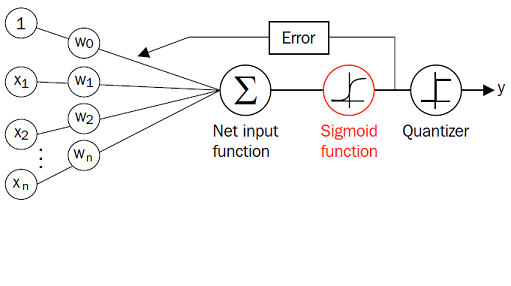

The output of the Sigmoid activation function is interpreted as the probability of particular sample belonging to class 1 $\sigma(z)=p\left(y=1|\mathbf{x,w}\right)$ given set of features $x$ and set of weights $w$. For instance, assume we have a binary classifier to classify samples of Iris-Versicolor ($y=1$) vs. Iris-Setosa ($y=0$). Then if we compute $\sigma(z)=0.9$, it means that the chance that this sample is an Iris-Versicolor flower is $90\%$. Similarly, the probability that this flower is an Iris-Setosa flower can be calculated as $p\left(y=0|\mathbf{x,w}\right) = 1 - p\left(y=1|\mathbf{x,w}\right) = 0.1$ or $10\%$.


So far we have discussed how Logistic regression makes predictions, but we did not talk about the cost function and learning process. Unlike the case in linear regression where we used MSE cost function, in logistic regression we use log-loss (also known as binary cross entropy (BCE)), given by the equation below:

\begin{equation}
    J(w)=\frac{1}{N} \sum_{i=1}^{N} [-y_{i}\cdot\log\left(\hat{y}_{i}\right)-\left(1-y_{i}\right)\cdot\log\left(1-\hat{y}_{i}\right)]
\end{equation}
where $y_{i}$ is the label  for training example $i$, $\hat{y}_{i}$ is the predicted class by applying the hypothesis or $\sigma(z)$.


For more information why we chose BCE over MSE, please refer to the lecture notes

Our main aim is to minimise our BCE cost function in order to get accurate predictions. In order to do that, we keep updating the parameter $w$ in the direction that minimises the cost function. The amount of change that we modify $w$ is called the gradient and is given by differentiating the cost function with respect to $w$. We can control how fast this gradient step is moving by introducing the learning rate ($\alpha$). This process is called Gradient Descent and is illustrated in the figure below:

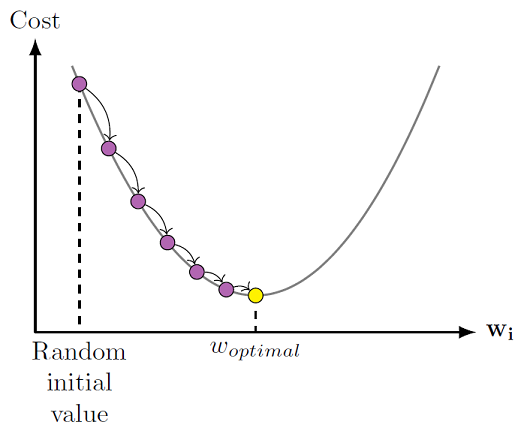


When the training is done and we want to predict the output using test data, the predicted probability can be converted into a binary outcome via a quantizer (unit step function) such that:

\begin{equation}
y_{pred} = \begin{cases}
      1 & \hat{y}\geq 0.5 \\
      0 & otherwise
   \end{cases}
\end{equation}


Reference:
"Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015


# Data Used & Problem Definition

We will use logistic regression as a binary classifier between Setosa vs other classes (verginica and versicolor grouped together). Here we say that data points with features that result in output probabilities closer to 0 are likely Setosa, while values closer to 1 are likely not Setosa. For simplicity, we will consider two features, petal length and sepal length, which can be visualised in a 2D plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

In [2]:
iris = datasets.load_iris()

In [3]:
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

In [4]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

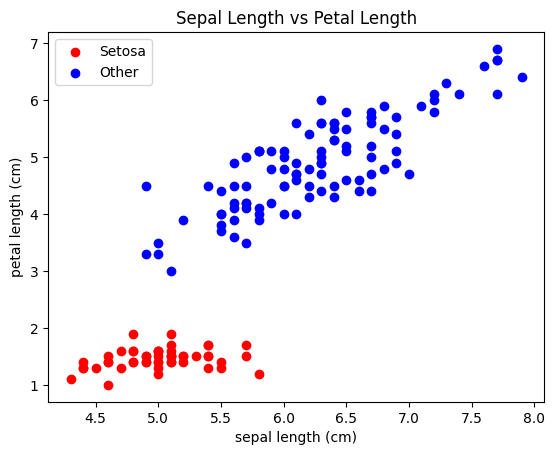

In [6]:
# Target labels are the index in iris.target_names
labels = iris_data.iloc[:,4]

# Setosa is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 0, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row)
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# Plot features in 2D plot - sepal length (x-axis) vs petal length (y-axis)
feat1, feat2 = 'sepal length (cm)', 'petal length (cm)'
X_target = iris_data[iris_data.target==0]
X_other = iris_data[iris_data.target!=0]

plt.scatter(X_target[feat1],X_target[feat2],color='red',marker='o',label="Setosa")
plt.scatter(X_other[feat1],X_other[feat2],color='blue',marker='o',label='Other')
plt.title("Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

In [7]:
def sigmoid(z):
    # Sigmoid function
    return 1 / (1 + np.exp(-z))

In [8]:
def cost(Y, y):
    # log-loss or Binary Cross Entropy (BCE)
    eps = 1e-15 # to avoid numerical error at log(0)
    return (-y * np.log(Y+eps) - (1 - y) * np.log(1 - Y + eps)).mean()

In [9]:
def plot_cost(loss):
    # Function for plotting the cost vs iterations.
    plt.plot(range(1, len(loss) + 1), loss)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    # plt.savefig('plot.pdf')
    plt.show()

In [10]:
def predict(X, W):
    # Function for predicting on test data (see Task 1)
    prediction = sigmoid(np.dot(X, W))
    return prediction.round()

In [11]:
def fit(alpha, num_iter, X, y):
    # weights initialization
    W = np.zeros(X.shape[1])
    loss_list = []
    for i in range(num_iter):
        # Feed forward
        z = np.dot(X, W)
        Y = sigmoid(z)
        # Gradient
        W += alpha * (np.dot(X.T, (y-Y)) / y.size)
        loss = cost(Y, y)
        loss_list.append(loss)

        if i % 100 == 0:
            print(f'iteration: {i+1} \t', f'cost: {loss} \t', f'weights: {W} \t')
    plot_cost(loss_list)
    # This function will return the final weights as an array
    return W

iteration: 1 	 cost: 0.6931471805599433 	 weights: [0.00166667 0.01253    0.01391667] 	
iteration: 101 	 cost: 0.39716904888478627 	 weights: [-0.05071148 -0.07762237  0.42536019] 	
iteration: 201 	 cost: 0.29984517309777964 	 weights: [-0.10551432 -0.23097319  0.68989714] 	
iteration: 301 	 cost: 0.2382094249373507 	 weights: [-0.14864573 -0.34969591  0.90262115] 	
iteration: 401 	 cost: 0.196815362215292 	 weights: [-0.18374873 -0.44513976  1.07818086] 	
iteration: 501 	 cost: 0.1674853678274873 	 weights: [-0.21316007 -0.52436457  1.22669262] 	
iteration: 601 	 cost: 0.14576052746256243 	 weights: [-0.23838792 -0.5918273   1.3549739 ] 	
iteration: 701 	 cost: 0.12908024748143987 	 weights: [-0.26043675 -0.65044743  1.46769223] 	
iteration: 801 	 cost: 0.11589461609963037 	 weights: [-0.27999968 -0.70221333  1.56813002] 	
iteration: 901 	 cost: 0.1052199140543055 	 weights: [-0.29757115 -0.74852835  1.65866121] 	
iteration: 1001 	 cost: 0.0964055186179073 	 weights: [-0.31351439 -0.7

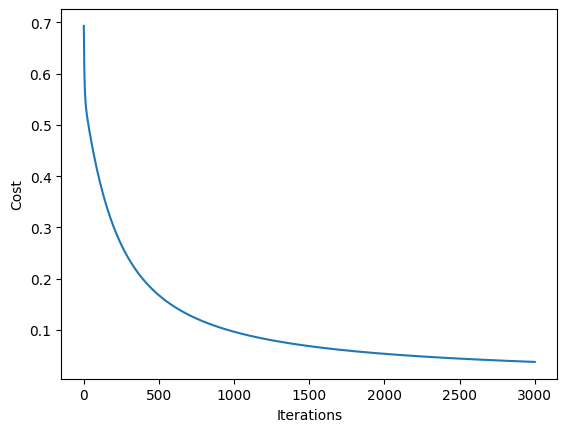

In [12]:
alpha = 0.01
num_iter = 3000
model_weights = fit(alpha, num_iter, X,y)

In [13]:
predictions = predict(X, model_weights)
pred = predictions.astype('int')
true = y.astype('int')

# Evaluation Metrics

Evaluation metrics are used to measure the performance of machine learning models. It is very important to evaluate the model after training takes place to decide whether the model can be implemented in the project or not. There are a variety of techniques used for evaluation such as classification accuracy, loss and confusion matrix. Confusion matrix is very useful tool for evaluation. It visualises the predictions for a classification problem against the real labels in table format.  Each row of the matrix represents the instances of real labels while each column represents the instances of predicted labels. The values of the confusion matrix are denoted by four categories, namely, true positive (TP), true negative (TN), false negative (FN) and false positive (FP). The outcomes of a confusion matrix can be visualised in Figure


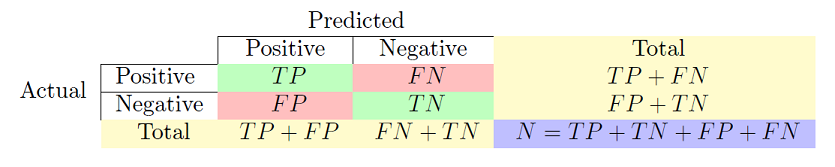

In [14]:
def compute_confusion_matrix(true, pred):

    num_cls = len(np.unique(true)) # Number of classes
    result = np.zeros((num_cls, num_cls))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

Confusion matrix result: 
[[ 50.   0.]
 [  0. 100.]]
accuracy = 100.00%


## Task 1 [40 marks]

In the provided code, the network's performance was assessed using the same training dataset for both training and evaluation, which is not a recommended practice in evaluating machine learning algorithms. Your task is to adjust the code to split the data into two separate sets: a training set and a testing set. The training set should account for 80% of the original data, while the remaining 20% will constitute the test data. Additionally, as part of your report, you should address the following points:

1. **Importance of Having Two Datasets**: In your report, discuss the significance of using two distinct datasets (training and testing) when evaluating a machine learning algorithm.

2. **Code for Data Splitting**: Provide the code you used to divide the original dataset into the training and testing datasets. Ensure that the split is random and maintains data integrity.

3. **Confusion Matrix and Accuracy**: After modifying the code and training the model on the training dataset, calculate the confusion matrix and total accuracy of the algorithm using the testing dataset. Include these performance metrics in your report to assess the model's effectiveness in classifying data.

Please ensure that your code is well-documented and your report provides clear explanations of the concepts discussed.


In [15]:
def split_data(X,Y,test_size):
  n_samples = len(Y)
  indices = np.arange(n_samples)
  np.random.shuffle(indices)
  split_index = int(n_samples * (1 - test_size))

  train_indices = indices[:split_index]
  test_indices = indices[split_index:]

  X_train = X[train_indices]
  Y_train = Y[train_indices]
  X_test = X[test_indices]
  Y_test = Y[test_indices]

  return X_train, X_test, Y_train, Y_test

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00183333 0.01326667 0.01417083] 	
iteration: 101 	 cost: 0.39502674371373736 	 weights: [-0.04543107 -0.06280763  0.4190557 ] 	
iteration: 201 	 cost: 0.3015890633306127 	 weights: [-0.09807298 -0.21310939  0.6785678 ] 	
iteration: 301 	 cost: 0.2411816347002553 	 weights: [-0.13995018 -0.33065626  0.88937689] 	
iteration: 401 	 cost: 0.20006421085089326 	 weights: [-0.17428205 -0.4257716   1.06451124] 	
iteration: 501 	 cost: 0.1706740305975476 	 weights: [-0.20319423 -0.50506236  1.21330151] 	
iteration: 601 	 cost: 0.1487769950940044 	 weights: [-0.22808571 -0.57277804  1.34219013] 	
iteration: 701 	 cost: 0.1318970255268903 	 weights: [-0.24990115 -0.63173822  1.45566139] 	
iteration: 801 	 cost: 0.11851598956564219 	 weights: [-0.26929892 -0.68388109  1.55690573] 	
iteration: 901 	 cost: 0.1076612912783618 	 weights: [-0.28675226 -0.730584    1.64825024] 	
iteration: 1001 	 cost: 0.09868516263586523 	 weights: [-0.30261084 -0.7

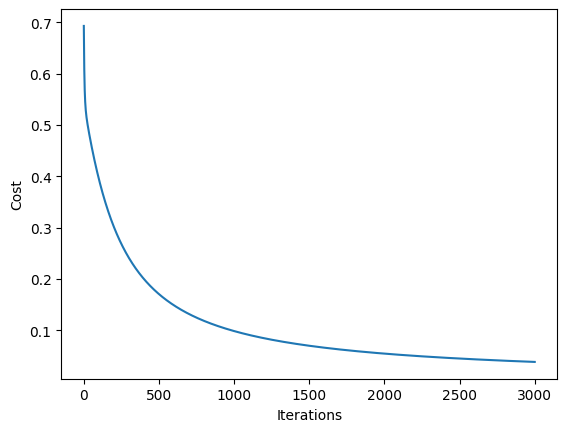

In [16]:
alpha = 0.01
num_iter = 3000
X_train, X_test, Y_train, Y_test = split_data(X,y, 0.2)
model_weights_t1 = fit(alpha, num_iter, X_train,Y_train)

predictions_t1 = predict(X_test, model_weights_t1)
pred_t1 = predictions_t1.astype('int')
true_t1 = Y_test.astype('int')


In [18]:
conf_matrix_t1 = compute_confusion_matrix(true_t1, pred_t1)
print('Confusion matrix result: ')
print(conf_matrix_t1)

diagonal_sum_t1 = conf_matrix_t1.trace()
sum_of_all_elements_t1 = conf_matrix_t1.sum()
accuracy_t1 = diagonal_sum_t1 / sum_of_all_elements_t1
print('accuracy = {:0.2f}%'.format(accuracy_t1*100))

Confusion matrix result: 
[[12.  0.]
 [ 0. 18.]]
accuracy = 100.00%


## Task 2 [20 marks]

In the provided code, the primary objective was to classify Iris-Setosa versus other classes. Your task is to modify the code so that it can classify Iris-Versicolor versus other classes and Iris-Virginica versus other classes separately. For each case, you should divide the dataset into training and testing subsets. Additionally, your report should cover the following aspects:

1. **Dataset Adjustment Code**: Provide the code you used to adjust the dataset for each classification scenario, ensuring that you have separate training and testing data for Iris-Versicolor versus other classes and Iris-Virginica versus other classes.

2. **Reporting Weights**: Present the final weights obtained for each classification case.

3. **Performance Comparison**: Compare the performance of the network for each classification case. Discuss any differences in performance and provide justifications for why the performance may vary between the two cases. Consider factors such as dataset characteristics and class separability.

Ensure that your code modifications are clearly documented, and your report provides insightful explanations for the observed differences in classification performance.


iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.0015     0.00842083 0.00394167] 	
iteration: 101 	 cost: 0.6408640343394051 	 weights: [ 0.02966989  0.13435749 -0.06959159] 	
iteration: 201 	 cost: 0.6303069956557633 	 weights: [ 0.04304829  0.19043517 -0.15405353] 	
iteration: 301 	 cost: 0.6239526959304896 	 weights: [ 0.05211367  0.23444524 -0.21946861] 	
iteration: 401 	 cost: 0.620046505530181 	 weights: [ 0.05793287  0.26934126 -0.27067622] 	
iteration: 501 	 cost: 0.617598021043716 	 weights: [ 0.06128065  0.29727559 -0.31114609] 	
iteration: 601 	 cost: 0.616035601415471 	 weights: [ 0.06272543  0.31983236 -0.34339443] 	
iteration: 701 	 cost: 0.6150216450037426 	 weights: [ 0.06268988  0.33819273 -0.36927346] 	
iteration: 801 	 cost: 0.6143524837668581 	 weights: [ 0.06149263  0.35324921 -0.39016763] 	
iteration: 901 	 cost: 0.6139029223756822 	 weights: [ 0.05937704  0.36568476 -0.40712665] 	
iteration: 1001 	 cost: 0.6135947525868447 	 weights: [ 0.05653113  0.3760279 

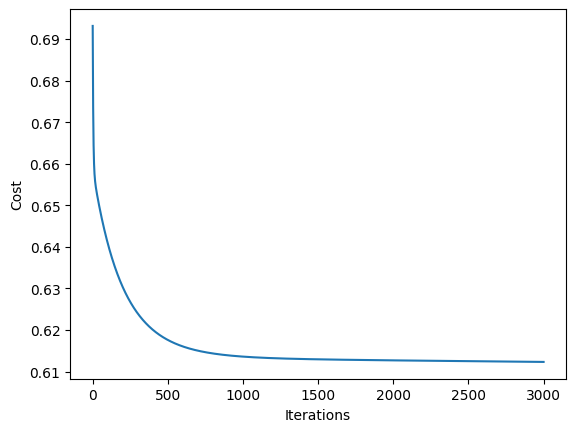

iteration: 1 	 cost: 0.6931471805599435 	 weights: [ 0.0015    0.006275 -0.000375] 	
iteration: 101 	 cost: 0.5632569379225622 	 weights: [ 0.07776848  0.21923956 -0.26247204] 	
iteration: 201 	 cost: 0.49343167083502865 	 weights: [ 0.13464009  0.36242664 -0.47571667] 	
iteration: 301 	 cost: 0.44910193646368907 	 weights: [ 0.18170336  0.47782711 -0.64455732] 	
iteration: 401 	 cost: 0.41859768609128206 	 weights: [ 0.22211142  0.57437375 -0.78384445] 	
iteration: 501 	 cost: 0.39620028523850126 	 weights: [ 0.25782092  0.65759335 -0.90264214] 	
iteration: 601 	 cost: 0.37890430791563656 	 weights: [ 0.29008115  0.73101433 -1.00663128] 	
iteration: 701 	 cost: 0.3650144045502312 	 weights: [ 0.3197204   0.79697814 -1.09951433] 	
iteration: 801 	 cost: 0.35351233965499584 	 weights: [ 0.34730847  0.85709745 -1.18380038] 	
iteration: 901 	 cost: 0.3437529679645783 	 weights: [ 0.37325064  0.9125206  -1.261251  ] 	
iteration: 1001 	 cost: 0.3353086438804947 	 weights: [ 0.39784363  0.96

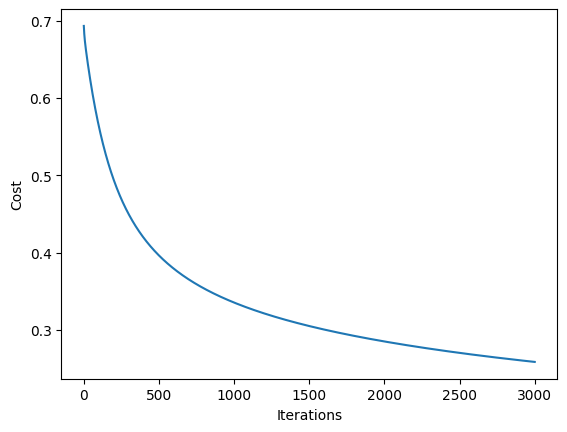

In [22]:
y_ve = np.where(labels == 1, 0, 1)
y_vi = np.where(labels == 2, 0, 1)

X_ve_train, X_ve_test, Y_ve_train, Y_ve_test = split_data(X,y_ve, 0.2)
model_weights_ve_t1 = fit(alpha, num_iter, X_ve_train,Y_ve_train)

X_vi_train, X_vi_test, Y_vi_train, Y_vi_test = split_data(X,y_vi, 0.2)
model_weights_vi_t1 = fit(alpha, num_iter, X_vi_train,Y_vi_train)

In [23]:
predictions_vi_t1 = predict(X_vi_test, model_weights_vi_t1)
pred_vi_t1 = predictions_vi_t1.astype('int')
true_vi_t1 = Y_vi_test.astype('int')

conf_matrix_vi_t1 = compute_confusion_matrix(true_vi_t1, pred_vi_t1)
print('Confusion matrix_vi result: ')
print(conf_matrix_vi_t1)

diagonal_sum_vi_t1 = conf_matrix_vi_t1.trace()
sum_of_all_elements_vi_t1 = conf_matrix_vi_t1.sum()
accuracy_vi_t1 = diagonal_sum_vi_t1 / sum_of_all_elements_vi_t1
print('accuracy_vi = {:0.2f}%'.format(accuracy_vi_t1*100))

predictions_ve_t1 = predict(X_ve_test, model_weights_ve_t1)
pred_ve_t1 = predictions_ve_t1.astype('int')
true_ve_t1 = Y_ve_test.astype('int')

conf_matrix_ve_t1 = compute_confusion_matrix(true_ve_t1, pred_ve_t1)
print('Confusion matrix_ve result: ')
print(conf_matrix_ve_t1)

diagonal_sum_ve_t1 = conf_matrix_ve_t1.trace()
sum_of_all_elements_ve_t1 = conf_matrix_ve_t1.sum()
accuracy_ve_t1 = diagonal_sum_ve_t1 / sum_of_all_elements_ve_t1
print('accuracy_ve = {:0.2f}%'.format(accuracy_ve_t1*100))

Confusion matrix_vi result: 
[[ 8.  0.]
 [ 1. 21.]]
accuracy_vi = 96.67%
Confusion matrix_ve result: 
[[ 0.  8.]
 [ 3. 19.]]
accuracy_ve = 63.33%


## Task 3 [40 marks]

In this tutorial, you were introduced to the parameter $\alpha$, also known as the learning rate. A fixed value of $0.01$ was chosen for our algorithm. Your task is to investigate the effect of selecting different values of $\alpha$ for the Iris-Setosa vs. All classifier. In your report, please cover the following aspects:

1. **Variation of $\alpha$**: Experiment with different values of $\alpha$ (e.g., 0.0001, 0.1, 1, 100). Note that you may want to print the loss more frequently to observe the initial behavior of the algorithm when using different $\alpha$ values.

2. **Code Execution**: Run the code for each of the specified $\alpha$ values and record the performance of the network for each case.

3. **Visualisation**: Include a graphical representation of the cost versus epochs for each $\alpha$ value. Additionally, report the accuracy of the test data and provide confusion matrices for each $\alpha$ value.

4. **Discussion**: In your own words, explain why the performance of the algorithm changes when using different $\alpha$ values. Discuss the effect of the learning rate on the gradient descent process, considering aspects like convergence speed, stability, and the risk of overshooting.

Ensure that your code adjustments are well-documented, and your report provides clear insights into the impact of varying the learning rate on the performance of the Iris-Setosa vs. All classifier.


iteration: 1 	 cost: 0.6931471805599435 	 weights: [1.58333333e-05 1.22375000e-04 1.39250000e-04] 	
iteration: 101 	 cost: 0.6624316168780171 	 weights: [0.00144692 0.01143427 0.01341247] 	
iteration: 201 	 cost: 0.6383070773247063 	 weights: [0.00260284 0.0210729  0.02550657] 	
iteration: 301 	 cost: 0.6192121254010364 	 weights: [0.0035199  0.02925896 0.03657623] 	
iteration: 401 	 cost: 0.6039510339390001 	 weights: [0.00423017 0.03618747 0.04675849] 	
iteration: 501 	 cost: 0.5916174427962252 	 weights: [0.00476147 0.04202784 0.05617243] 	
iteration: 601 	 cost: 0.581527221001632 	 weights: [0.00513775 0.0469257  0.06492039] 	
iteration: 701 	 cost: 0.5731641123677701 	 weights: [0.00537951 0.05100562 0.07308982] 	
iteration: 801 	 cost: 0.5661376539905428 	 weights: [0.00550425 0.05437399 0.08075526] 	
iteration: 901 	 cost: 0.5601513890939924 	 weights: [0.00552695 0.05712167 0.08798027] 	
iteration: 1001 	 cost: 0.5549791646435279 	 weights: [0.00546045 0.05932641 0.09481913] 	


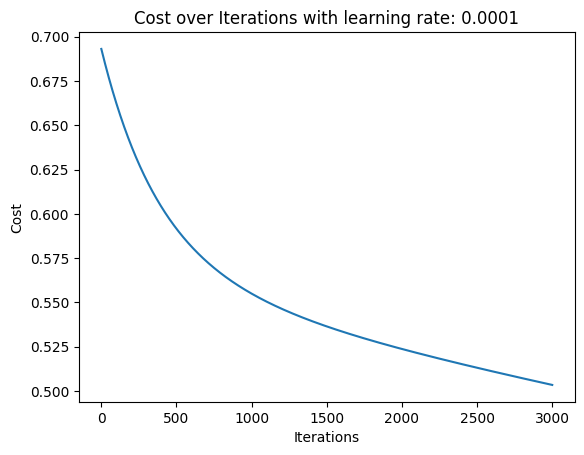

Confusion matrix_se of alpha = 0.0001 result: 
[[ 0.  9.]
 [ 0. 21.]]
accuracy_se = 70.00%
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00015833 0.00122375 0.0013925 ] 	
iteration: 101 	 cost: 0.5548201521756176 	 weights: [0.00548879 0.05973582 0.09558769] 	
iteration: 201 	 cost: 0.5236921549908282 	 weights: [0.00168772 0.06262086 0.15016359] 	
iteration: 301 	 cost: 0.5034213367708668 	 weights: [-0.0046798   0.04953248  0.19261448] 	
iteration: 401 	 cost: 0.485351550426155 	 weights: [-0.01181065  0.03126914  0.23029914] 	
iteration: 501 	 cost: 0.46837259877868365 	 weights: [-0.01909848  0.01145057  0.2656688 ] 	
iteration: 601 	 cost: 0.4522889566630319 	 weights: [-0.02632136 -0.00859319  0.29963473] 	
iteration: 701 	 cost: 0.4370343170087182 	 weights: [-0.03339694 -0.02835972  0.33255875] 	
iteration: 801 	 cost: 0.4225622569185809 	 weights: [-0.04029651 -0.04766312  0.36459508] 	
iteration: 901 	 cost: 0.40883023870141005 	 weights: [-0.04701254 -0.06644191  0.3

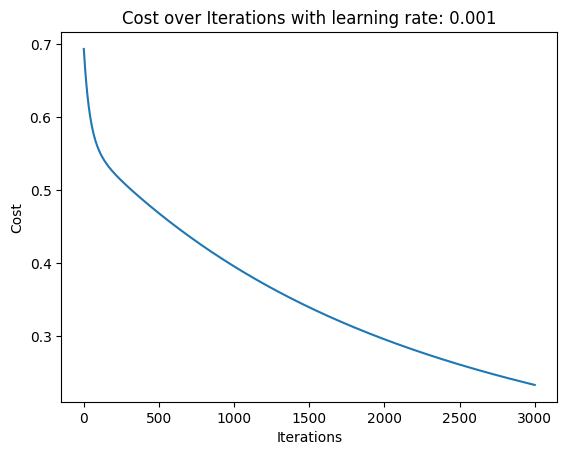

Confusion matrix_se of alpha = 0.001 result: 
[[ 9.  0.]
 [ 0. 21.]]
accuracy_se = 100.00%
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00158333 0.0122375  0.013925  ] 	
iteration: 101 	 cost: 0.3956262206422429 	 weights: [-0.05421519 -0.08654313  0.4293797 ] 	
iteration: 201 	 cost: 0.2959379837607019 	 weights: [-0.11061141 -0.24253348  0.69638478] 	
iteration: 301 	 cost: 0.23357474740910422 	 weights: [-0.15468391 -0.36264712  0.90979412] 	
iteration: 401 	 cost: 0.19206260885180673 	 weights: [-0.19036369 -0.45884202  1.08514179] 	
iteration: 501 	 cost: 0.16284014023289106 	 weights: [-0.22013964 -0.53847018  1.23299193] 	
iteration: 601 	 cost: 0.14130129693731283 	 weights: [-0.24560256 -0.60613623  1.36038747] 	
iteration: 701 	 cost: 0.12482703671997042 	 weights: [-0.26780407 -0.66483907  1.47211302] 	
iteration: 801 	 cost: 0.11184398820486792 	 weights: [-0.28746549 -0.71661231  1.5715137 ] 	
iteration: 901 	 cost: 0.10135944990813608 	 weights: [-0.30509888 -0.7

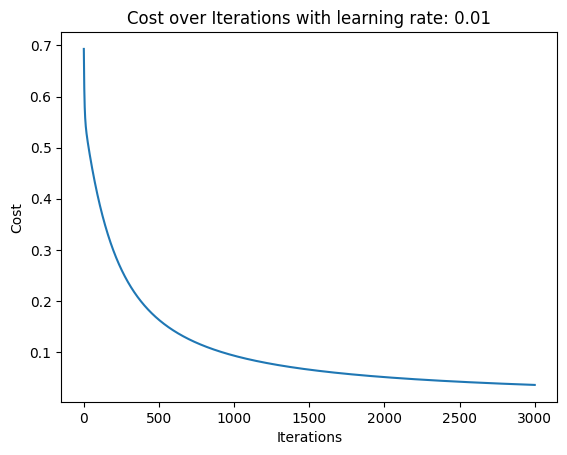

Confusion matrix_se of alpha = 0.01 result: 
[[ 9.  0.]
 [ 0. 21.]]
accuracy_se = 100.00%
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.01583333 0.122375   0.13925   ] 	
iteration: 101 	 cost: 0.0921069152232128 	 weights: [-0.32368522 -0.81136536  1.75536803] 	
iteration: 201 	 cost: 0.05057597154230223 	 weights: [-0.43162995 -1.09117638  2.31036758] 	
iteration: 301 	 cost: 0.03539664871917179 	 weights: [-0.49731434 -1.25974695  2.6515598 ] 	
iteration: 401 	 cost: 0.02745034909510487 	 weights: [-0.54488114 -1.38121101  2.89984496] 	
iteration: 501 	 cost: 0.022530687834160353 	 weights: [-0.58230886 -1.47647499  3.09576805] 	
iteration: 601 	 cost: 0.019170964550764166 	 weights: [-0.61323486 -1.55500217  3.25795788] 	
iteration: 701 	 cost: 0.01672353154278083 	 weights: [-0.63962769 -1.62189089  3.39654876] 	
iteration: 801 	 cost: 0.01485714965321469 	 weights: [-0.66267478 -1.68020671  3.51767724] 	
iteration: 901 	 cost: 0.013384383726189476 	 weights: [-0.68314843 -

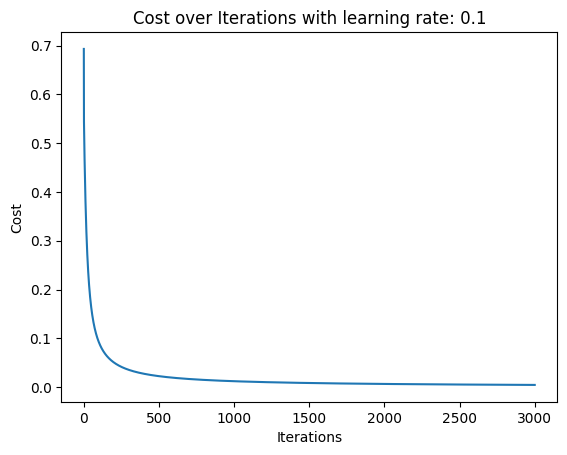

Confusion matrix_se of alpha = 0.1 result: 
[[ 9.  0.]
 [ 0. 21.]]
accuracy_se = 100.00%
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.15833333 1.22375    1.3925    ] 	


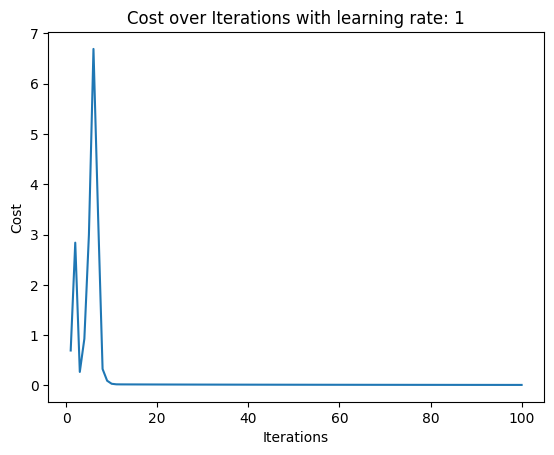

Confusion matrix_se of alpha = 1 result: 
[[ 9.  0.]
 [ 0. 21.]]
accuracy_se = 100.00%
iteration: 1 	 cost: 0.6931471805599435 	 weights: [ 1.58333333 12.2375     13.925     ] 	


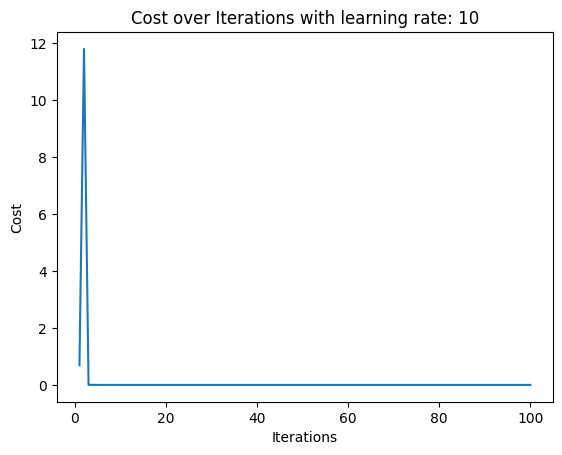

Confusion matrix_se of alpha = 10 result: 
[[ 9.  0.]
 [ 0. 21.]]
accuracy_se = 100.00%
iteration: 1 	 cost: 0.6931471805599435 	 weights: [ 15.83333333 122.375      139.25      ] 	


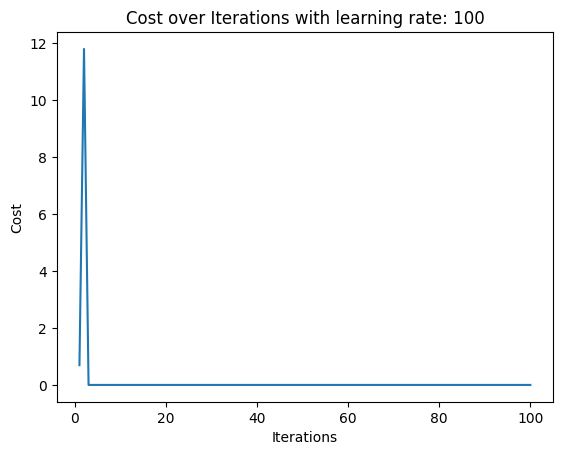

Confusion matrix_se of alpha = 100 result: 
[[ 9.  0.]
 [ 0. 21.]]
accuracy_se = 100.00%


In [24]:
def plot_cost(loss, alpha):
    # Function for plotting the cost vs iterations.
    plt.plot(range(1, len(loss) + 1), loss)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f"Cost over Iterations with learning rate: {alpha}")
    # plt.savefig('plot.pdf')
    plt.show()

def fit(alpha, num_iter, X, y):
    # weights initialization
    W = np.zeros(X.shape[1])
    loss_list = []
    for i in range(num_iter):
        # Feed forward
        z = np.dot(X, W)
        Y = sigmoid(z)
        # Gradient
        W += alpha * (np.dot(X.T, (y-Y)) / y.size)
        loss = cost(Y, y)
        loss_list.append(loss)

        if i % 100 == 0:
            print(f'iteration: {i+1} \t', f'cost: {loss} \t', f'weights: {W} \t')
    plot_cost(loss_list, alpha)
    # This function will return the final weights as an array
    return W


y_se = np.where(labels == 0, 0, 1)

X_se_train, X_se_test, Y_se_train, Y_se_test = split_data(X,y_se, 0.2)


def multiples_of_10(start_index, end_index):
    return [10**i for i in range(start_index, end_index + 1)]

alpha_set= multiples_of_10(-4,2)

for alpha in alpha_set:

  if alpha >= 1:
    model_weights_se_t1 = fit(alpha, int(num_iter/30), X_se_train,Y_se_train)
  else:
    model_weights_se_t1 = fit(alpha, num_iter, X_se_train,Y_se_train)

  predictions_se_t1 = predict(X_se_test, model_weights_se_t1)
  pred_se_t1 = predictions_se_t1.astype('int')
  true_se_t1 = Y_se_test.astype('int')

  conf_matrix_se_t1 = compute_confusion_matrix(true_se_t1, pred_se_t1)
  print(f'Confusion matrix_se of alpha = {alpha} result: ')
  print(conf_matrix_se_t1)

  diagonal_sum_se_t1 = conf_matrix_se_t1.trace()
  sum_of_all_elements_se_t1 = conf_matrix_se_t1.sum()
  accuracy_se_t1 = diagonal_sum_se_t1 / sum_of_all_elements_se_t1
  print('accuracy_se = {:0.2f}%'.format(accuracy_se_t1*100))

iteration: 1 	 cost: 0.6931471805599435 	 weights: [1.33333333e-05 1.07625000e-04 1.29416667e-04] 	
iteration: 101 	 cost: 0.667712148720373 	 weights: [0.00121178 0.01005451 0.01250747] 	
iteration: 201 	 cost: 0.647498202468627 	 weights: [0.00216575 0.01852263 0.02386259] 	
iteration: 301 	 cost: 0.6313031829413541 	 weights: [0.00290644 0.0257003  0.03432382] 	
iteration: 401 	 cost: 0.618198770706718 	 weights: [0.00346149 0.03175452 0.04400587] 	
iteration: 501 	 cost: 0.607474229677409 	 weights: [0.00385504 0.03683118 0.05300906] 	
iteration: 601 	 cost: 0.5985874657877583 	 weights: [0.00410801 0.04105672 0.06142025] 	
iteration: 701 	 cost: 0.5911252439867571 	 weights: [0.00423846 0.04454016 0.06931433] 	
iteration: 801 	 cost: 0.5847720662197748 	 weights: [0.00426194 0.04737535 0.07675566] 	
iteration: 901 	 cost: 0.5792863539977673 	 weights: [0.00419184 0.04964309 0.08379955] 	
iteration: 1001 	 cost: 0.5744824405739141 	 weights: [0.00403974 0.05141305 0.09049361] 	
ite

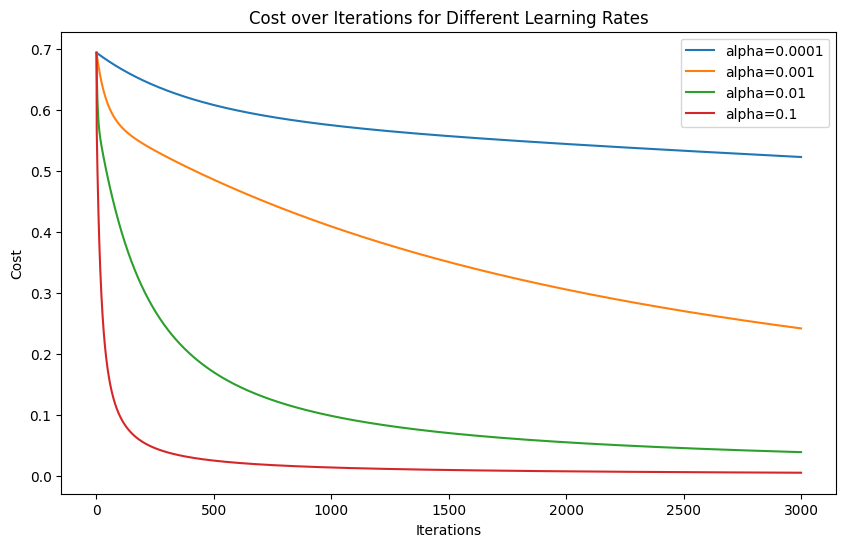

In [25]:
def plot_cost(loss, alpha):
    # Function for plotting the cost vs. iterations with a label for each alpha
    plt.plot(range(1, len(loss) + 1), loss, label=f'alpha={alpha}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title("Cost over Iterations for Different Learning Rates")
    plt.legend()  # Show legend to distinguish learning rates

def fit(alpha, num_iter, X, y):
    # weights initialization
    W = np.zeros(X.shape[1])
    loss_list = []
    for i in range(num_iter):
        # Feed forward
        z = np.dot(X, W)
        Y = sigmoid(z)
        # Gradient
        W += alpha * (np.dot(X.T, (y - Y)) / y.size)
        loss = cost(Y, y)
        loss_list.append(loss)

        if i % 100 == 0:
            print(f'iteration: {i+1} \t', f'cost: {loss} \t', f'weights: {W} \t')
    plot_cost(loss_list, alpha)  # Pass alpha as a label to the plot
    return W

def multiples_of_10(start_index, end_index):
    return [10**i for i in range(start_index, end_index + 1)]

X_se_train, X_se_test, Y_se_train, Y_se_test = split_data(X, y_se, 0.2)


#alpha_set = multiples_of_10(0, 2)
alpha_set = multiples_of_10(-4, -1)

num_iter = 3000

plt.figure(figsize=(10, 6))

for alpha in alpha_set:

    iterations = num_iter if alpha < 1 else int(num_iter / 30)
    model_weights_se_t1 = fit(alpha, iterations, X_se_train, Y_se_train)

    predictions_se_t1 = predict(X_se_test, model_weights_se_t1)
    pred_se_t1 = predictions_se_t1.astype('int')
    true_se_t1 = Y_se_test.astype('int')

    conf_matrix_se_t1 = compute_confusion_matrix(true_se_t1, pred_se_t1)
    print(f'Confusion matrix_se of alpha = {alpha} result: ')
    print(conf_matrix_se_t1)

    diagonal_sum_se_t1 = conf_matrix_se_t1.trace()
    sum_of_all_elements_se_t1 = conf_matrix_se_t1.sum()
    accuracy_se_t1 = diagonal_sum_se_t1 / sum_of_all_elements_se_t1
    print('accuracy_se = {:0.2f}%'.format(accuracy_se_t1 * 100))

plt.show()